The task is to collect OHLC price data for top-50 coin pairs coin/BTC by market capitalization from the Poloniex exchange (the length of period – 1 year, timeframe – 2 hours)

In [ ]:
%matplotlib inline

from urllib.request import urlopen, Request
from urllib.parse import urlencode

import json
import time, datetime
from datetime import date, datetime

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# Define top50 coins

Download tickers from Poloneix 

In [21]:
df_tickers = pd.read_json('https://poloniex.com/public?command=returnTicker')

Keep pairs of form BTC_X, where X - another criptocurrency

In [41]:
polon_tickers = [ticker[4:] for ticker in list(df_tickers) if ticker[0:3]=='BTC']

In [43]:
polon_tickers

['AMP',
 'ARDR',
 'BCH',
 'BCN',
 'BCY',
 'BELA',
 'BLK',
 'BTCD',
 'BTM',
 'BTS',
 'BURST',
 'CLAM',
 'CVC',
 'DASH',
 'DCR',
 'DGB',
 'DOGE',
 'EMC2',
 'ETC',
 'ETH',
 'EXP',
 'FCT',
 'FLDC',
 'FLO',
 'GAME',
 'GAS',
 'GNO',
 'GNT',
 'GRC',
 'HUC',
 'LBC',
 'LSK',
 'LTC',
 'MAID',
 'NAUT',
 'NAV',
 'NEOS',
 'NMC',
 'NOTE',
 'NXC',
 'NXT',
 'OMG',
 'OMNI',
 'PASC',
 'PINK',
 'POT',
 'PPC',
 'RADS',
 'REP',
 'RIC',
 'SBD',
 'SC',
 'SJCX',
 'STEEM',
 'STR',
 'STRAT',
 'SYS',
 'VIA',
 'VRC',
 'VTC',
 'XBC',
 'XCP',
 'XEM',
 'XMR',
 'XPM',
 'XRP',
 'XVC',
 'ZEC',
 'ZRX']

### Collect coins capitalization from Coinmarketcap.com

API: https://coinmarketcap.com/api/

In [34]:
df_cap = pd.read_json('https://api.coinmarketcap.com/v1/ticker/')

In [36]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 0 to 1116
Data columns (total 14 columns):
24h_volume_usd        1037 non-null float64
available_supply      877 non-null float64
id                    1117 non-null object
last_updated          1117 non-null int64
market_cap_usd        877 non-null float64
name                  1117 non-null object
percent_change_1h     1038 non-null float64
percent_change_24h    1053 non-null float64
percent_change_7d     1065 non-null float64
price_btc             1117 non-null float64
price_usd             1117 non-null float64
rank                  1117 non-null int64
symbol                1117 non-null object
total_supply          991 non-null float64
dtypes: float64(9), int64(2), object(3)
memory usage: 130.9+ KB


### Take top50 coins by capitalization, which have data on Poloneix

In [45]:
# take capitalization data by tickers which are present on Poloneix
df_polon_cap = df_cap[df_cap.symbol.isin(polon_tickers)].copy(deep=True)
# sort by capitalization
df_polon_cap.sort_values('market_cap_usd', ascending=False, inplace=True)
df_polon_cap.reset_index(inplace=True, drop=True)

In [54]:
df_polon_cap.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,397724000.0,9.478042e+07,ethereum,1506162850,2.616973e+10,Ethereum,2.11,6.21,10.48,0.073904,276.109000,2,ETH,9.478042e+07
1,211988000.0,1.660666e+07,bitcoin-cash,1506162865,7.065620e+09,Bitcoin Cash,1.14,2.82,0.38,0.113883,425.469000,3,BCH,1.660666e+07
2,33554000.0,3.834384e+10,ripple,1506162841,6.801584e+09,Ripple,1.16,3.47,-1.42,0.000047,0.177384,4,XRP,9.999452e+10
3,58638700.0,7.574437e+06,dash,1506162843,2.691501e+09,Dash,-0.45,4.80,22.84,0.095112,355.340000,5,DASH,7.574437e+06
4,204277000.0,5.305976e+07,litecoin,1506162842,2.603016e+09,Litecoin,1.52,6.18,-0.70,0.013131,49.058200,6,LTC,5.305976e+07


In [55]:
df_polon_cap.tail()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
64,85748.90,20694958.0,primecoin,1506162841,2522239.0,Primecoin,-0.93,2.32,3.60,0.000033,0.121877,318,XPM,20694958.0
65,9311.60,16180000.0,nautiluscoin,1506162843,2085489.0,NautilusCoin,0.85,4.26,0.62,0.000034,0.128893,335,NAUT,16180000.0
66,8123.31,19319230.0,huntercoin,1506162847,1758960.0,HunterCoin,0.07,7.60,19.32,0.000024,0.091047,346,HUC,19319230.0
67,185599.00,37425375.0,riecoin,1506162843,1704434.0,Riecoin,-2.18,7.59,35.48,0.000012,0.045542,349,RIC,37425375.0
68,73831.30,NaN,storjcoin-x,1506162845,NaN,Storjcoin X,-0.33,-2.10,5.96,0.000140,0.524165,896,SJCX,500000000.0


In [56]:
top50 = df_polon_cap.symbol[0:50]

In [58]:
top50

0       ETH
1       BCH
2       XRP
3      DASH
4       LTC
5       XEM
6       XMR
7       ETC
8       OMG
9       LSK
10      ZEC
11    STRAT
12    STEEM
13     MAID
14      BCN
15      GNT
16      DCR
17      REP
18      BTS
19      FCT
20      GAS
21       SC
22      CVC
23     ARDR
24      DGB
25     BTCD
26      GNO
27     GAME
28      ZRX
29     DOGE
30      SYS
31      BTM
32      NXT
33      NAV
34      VTC
35      PPC
36      XCP
37      NXC
38      VIA
39      NMC
40     CLAM
41      EXP
42      POT
43     RADS
44      LBC
45    BURST
46     EMC2
47     OMNI
48      BLK
49      GRC
Name: symbol, dtype: object

In [57]:
len(top50)

50

# Download OHLC price data from Poloniex

API: https://poloniex.com/support/api/

Define the current date

In [15]:
instant_datetime = datetime.now()
instant_date = datetime.date(instant_datetime)

Define the time period of the interval

In [16]:
start_date = datetime(instant_date.year-1, instant_date.month, instant_date.day)
end_date = instant_date

Define parameters for the API query

In [17]:
command = 'returnChartData' # API command
currency_pair = 'ETH' # default value
start = start_date.timestamp() # UNIX timestamp
end = '9999999999'
period = '7200' # time in seconds (equal to 2 hours)

For each coin pair send API query and append OHLC-data to the dictionary

In [ ]:
dict_ohlc = {}
for currency_pair in polon_tickers: #top50:
    url = 'https://poloniex.com/public?command=%s&currencyPair=BTC_%s&start=%s&end=%s&period=%s'\
        % (command, currency_pair, start, end, period)
    df_ohlc = pd.read_json(url)
    # print(currency_pair, '\n', df_ohlc.info())
    dict_ohlc[currency_pair] = df_ohlc

In [81]:
# add month_year column

for index in dict_ohlc:
    dict_ohlc[index]['month_year'] = dict_ohlc[index]['date'].apply(lambda d: str(d.month)+'_'+str(d.year))

In [86]:
# function to plot data of time

def plot_price(dict_ohlc, currency, price_type):
    dict_ohlc[currency].plot(x='month_year', y=price_type, label=currency)


Vizualize downloaded data

/Users/ruslan/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


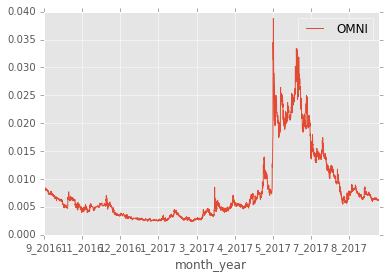

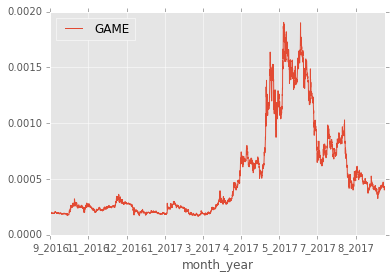

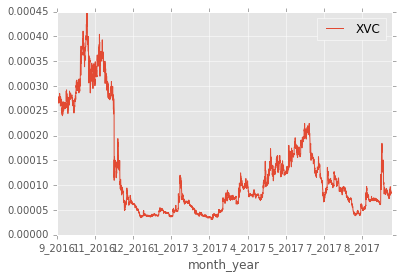

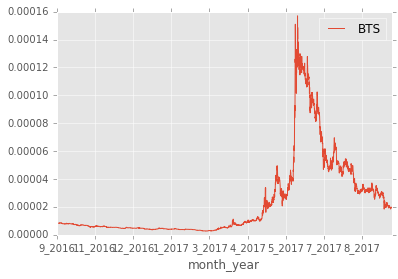

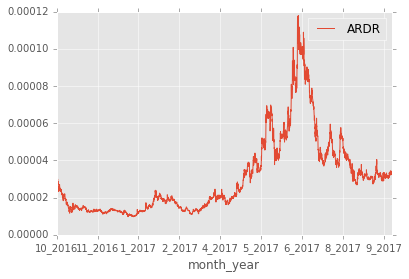

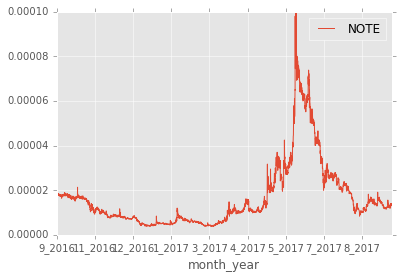

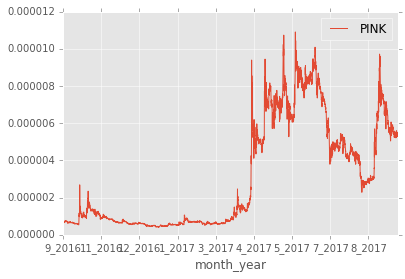

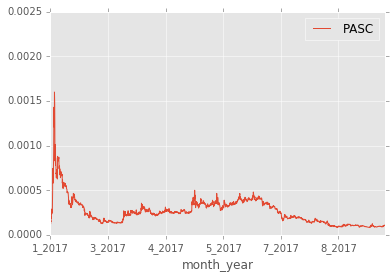

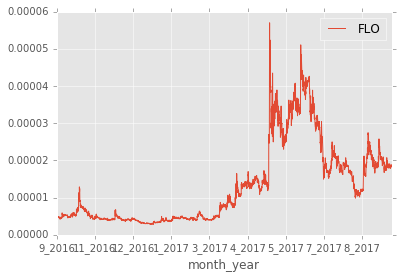

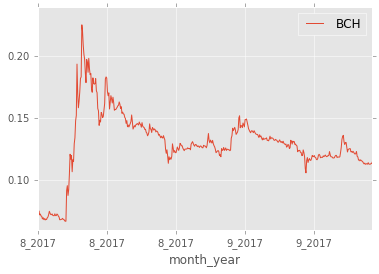

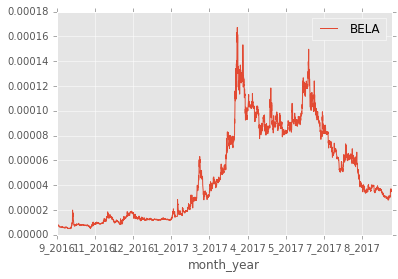

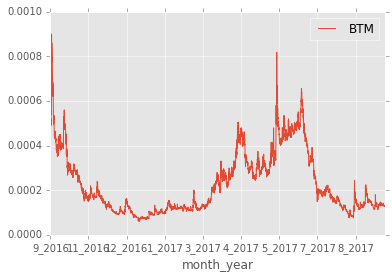

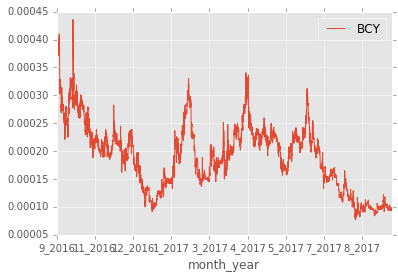

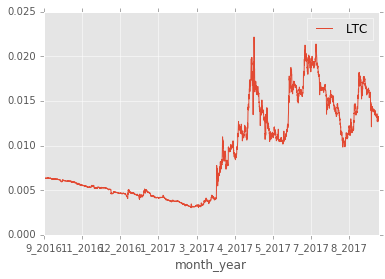

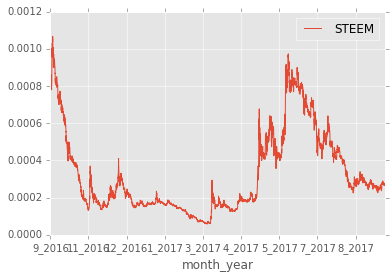

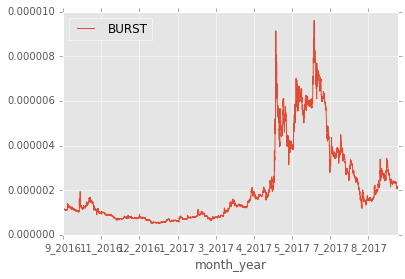

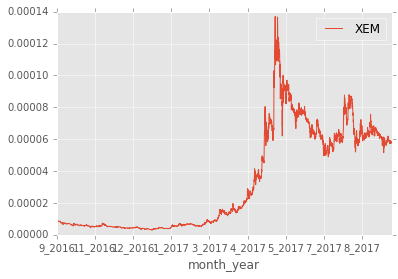

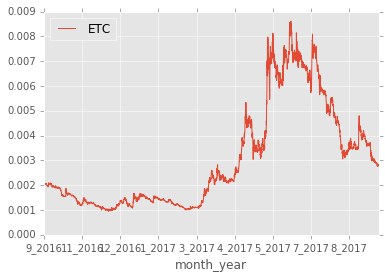

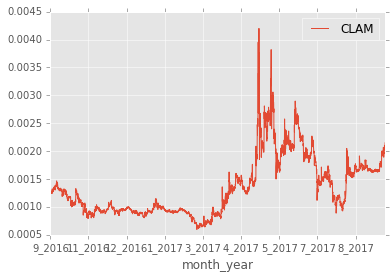

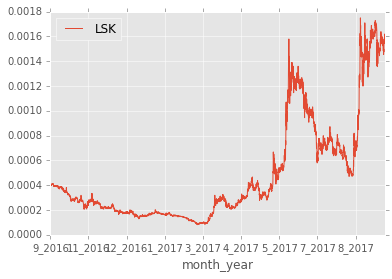

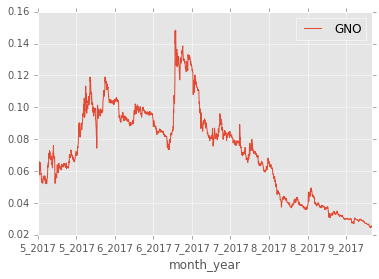

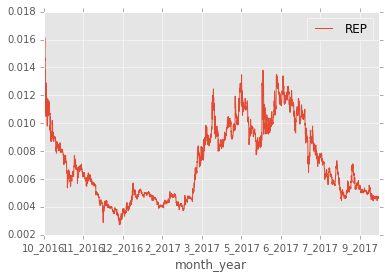

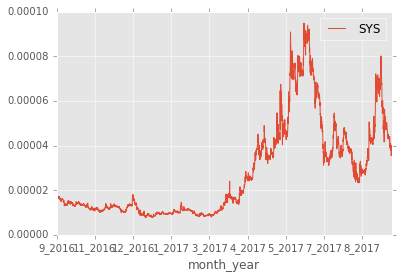

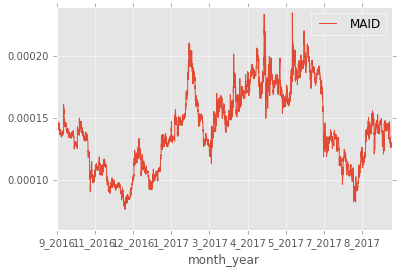

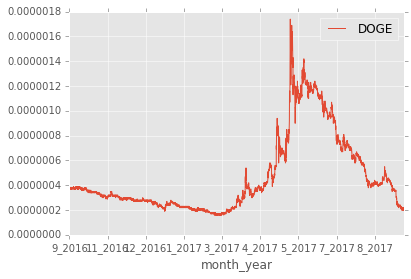

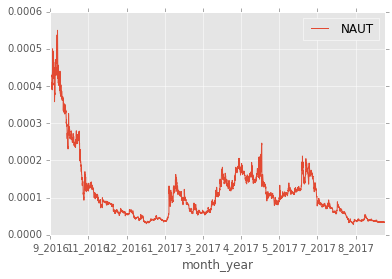

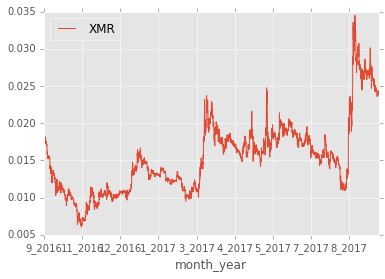

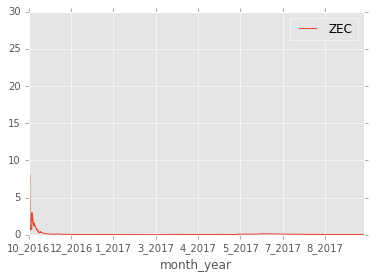

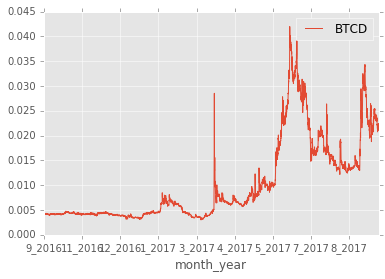

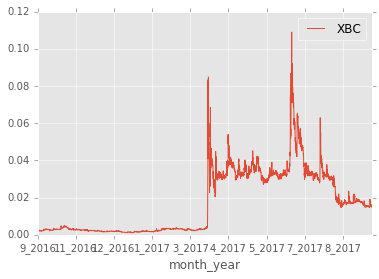

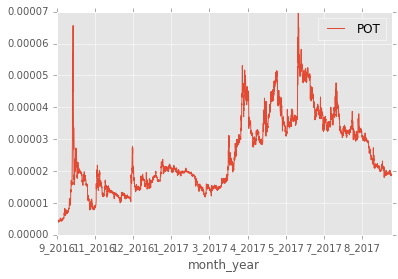

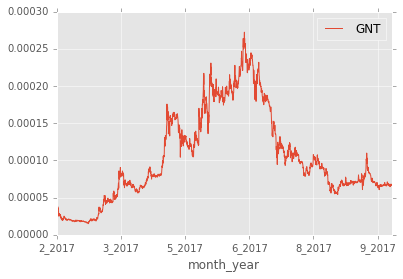

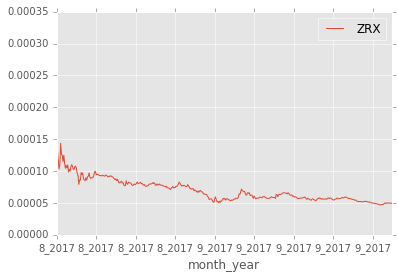

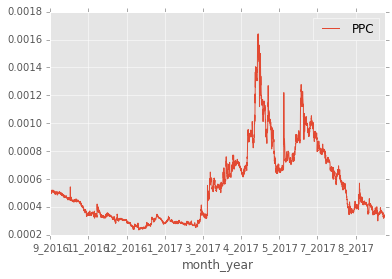

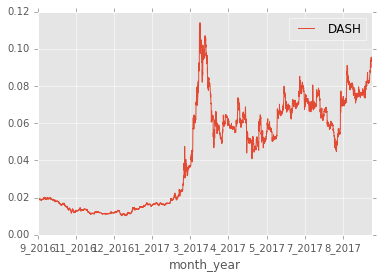

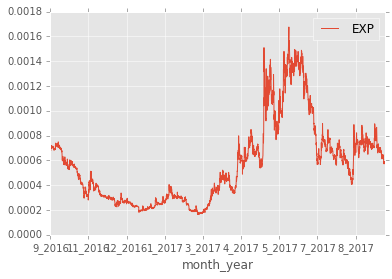

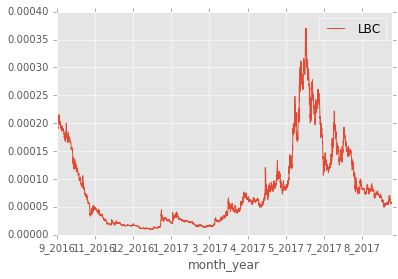

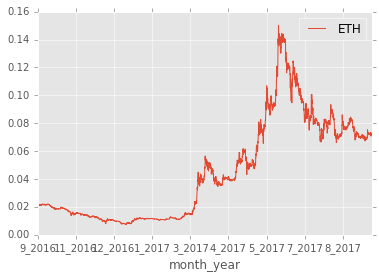

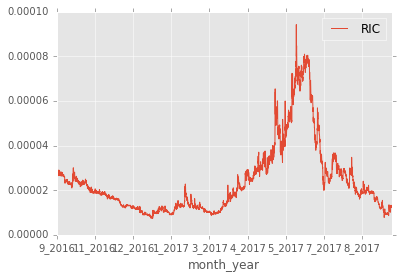

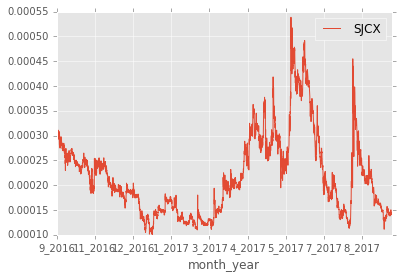

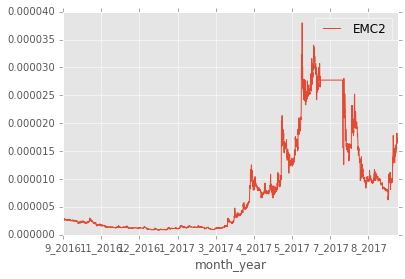

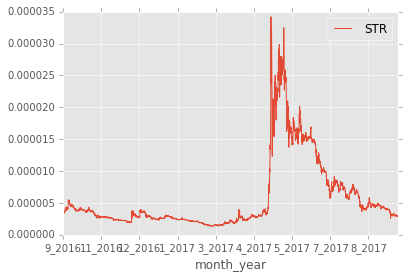

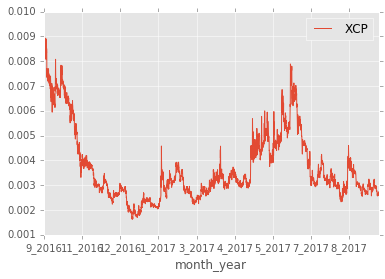

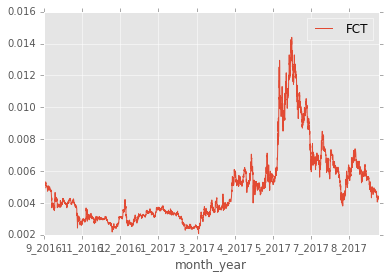

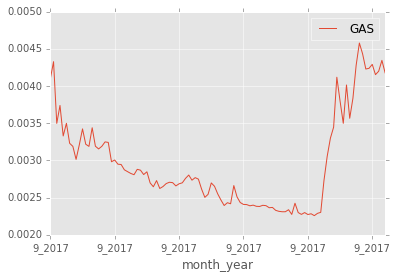

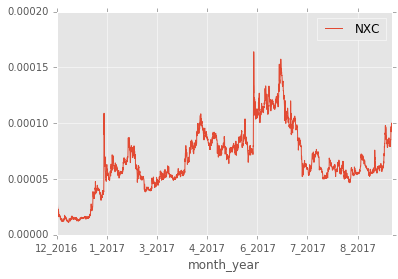

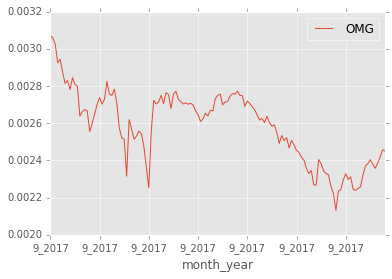

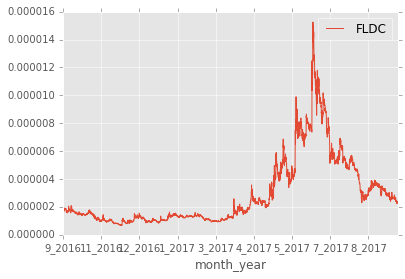

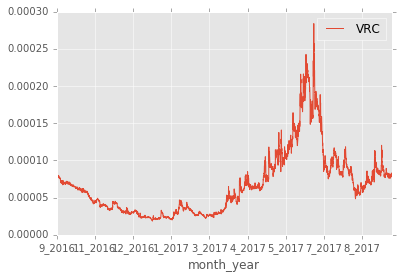

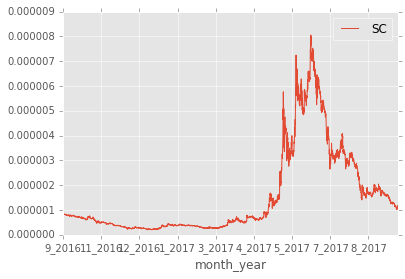

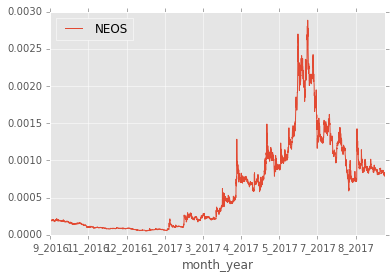

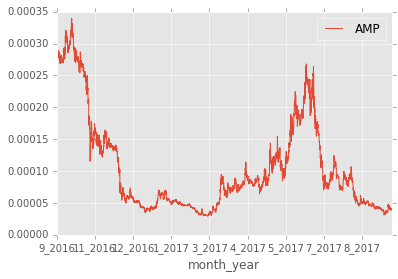

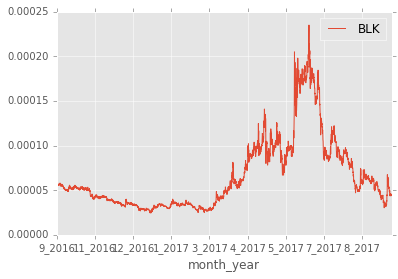

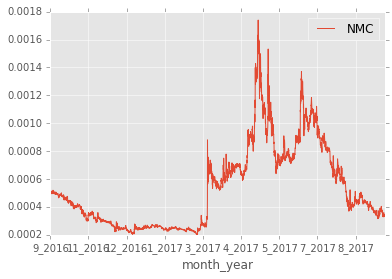

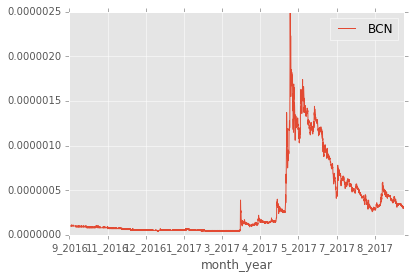

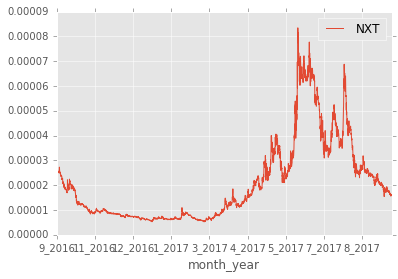

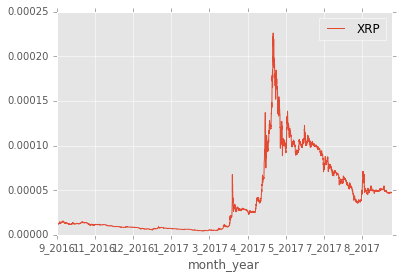

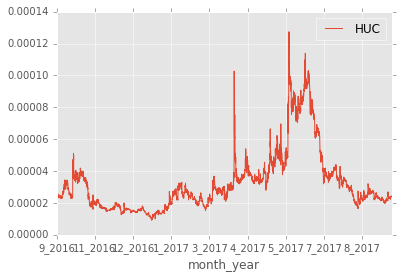

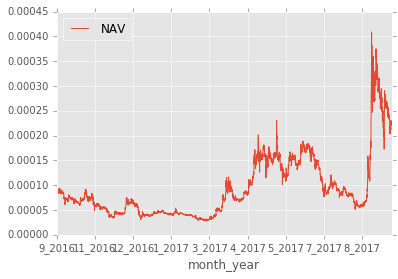

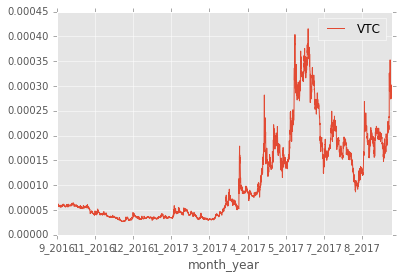

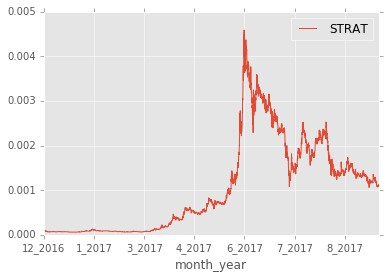

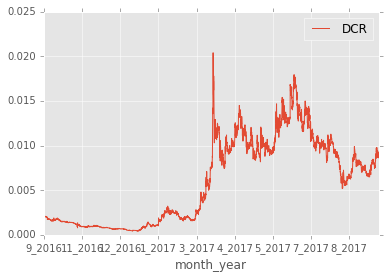

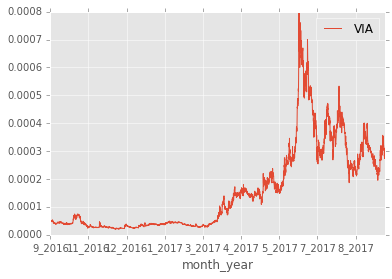

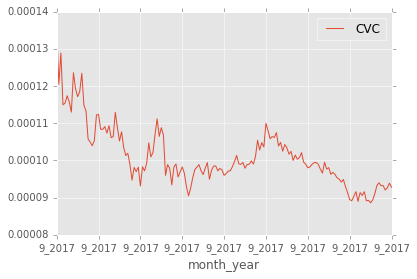

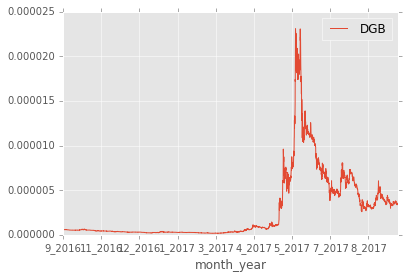

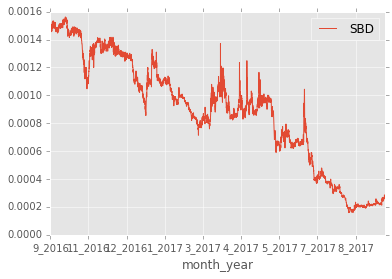

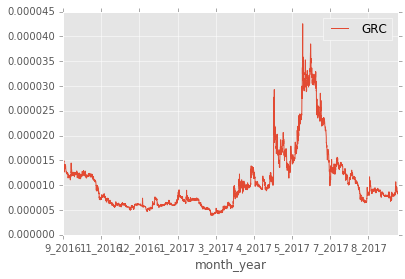

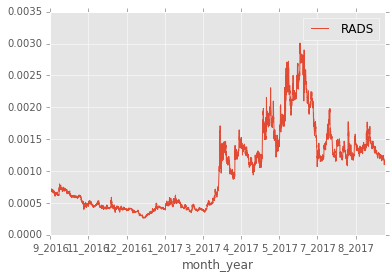

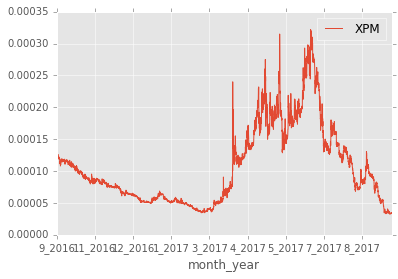

In [88]:
for index in dict_ohlc:
    plot_price(dict_ohlc, index, 'close')

NB: next currencies has less than year statistics depth

BCH, OMG, 
ZEC,
STRAT,
GNT,
REP,
GAS,
CVC,
ARDR,
GNO,
ZRX,
NXC